In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from statistics import median

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

plt.ioff()

In [2]:
RESCALE = -10000000
KERNEL = 1
FEATURES = 8
BATCH = 10
EPOCH = 40
DATA_SHAPE = 100

In [3]:
#function that loads files for the network
def load_files(filenames, category, num_categories):
    #the 1D convnet needs to specify the third axis of the tensor
    glitches = np.zeros((len(filenames), DATA_SHAPE, 1))
    category_matrix = np.zeros((len(filenames), num_categories))
    for i in range(len(filenames)):
        current_data = np.loadtxt(filenames[i])
        glitches[i,:,0] = current_data[1]
        #I save 1s on the axis for that respective category
        category_matrix[i,category] = 1
    return glitches, category_matrix

In [4]:
glitches, cat_glitches = load_files(glob("Test Data/glitch/*.txt"), 0, 2)
no_glitches, cat_no_glitches = load_files(glob("Test Data/no_glitch/*.txt"), 1, 2)

#long_glitches, cat_long_glitches = load_files(glob("Train Data/long_glitch/*.txt"), 2, 3)

In [5]:
x = np.concatenate((glitches, no_glitches))
                    #long_glitches))
y = np.concatenate((cat_glitches, cat_no_glitches))
                    #cat_long_glitches))

In [6]:
# traslate the data on on each median
for i in range(len(x)):
    x[i,:,0] = x[i,:,0] - median(x[i,:,0])

In [7]:
# rescale the data: the network gives problems with too small data. 
# The rescaling is arbitrary, but it works.
for j in range(len(x)):
    for i in range(100):
        x[j,i,0] = x[j,i,0] * RESCALE

In [8]:
# I run a permutation, in order to mix up the data
perm = np.random.permutation(x.shape[0])
# I want to have the same permutation on both x and y 
np.take(x, perm, axis=0, out=x)
np.take(y, perm, axis=0, out=y)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [9]:
print(x.shape, y.shape)

(98, 100, 1) (98, 2)


In [10]:
my_model = models.load_model("networks/glitch_detector.h5")

In [11]:
my_model.evaluate(x,y[:,0])

98/98 [==============================] - 0s 998us/sample - loss: 0.1316 - accuracy: 0.9694


[0.13159585911400465, 0.96938777]

In [14]:
info_string = "Day: 104 \nFrequency: 143GHz \nBolometer = 1a \nAccuracy test: 97%"
text_file = open("plots_for_latex/info_3.txt", "w")
text_file.write(info_string)
text_file.close()

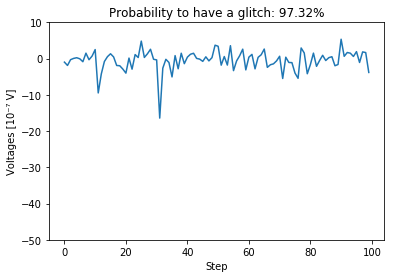

yes


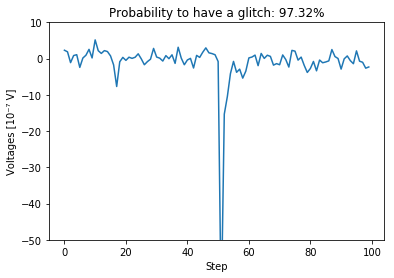

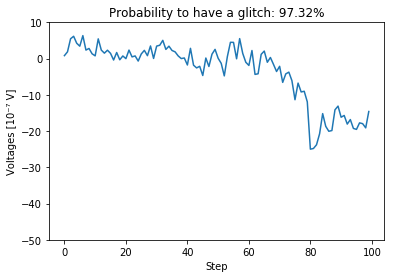

yes


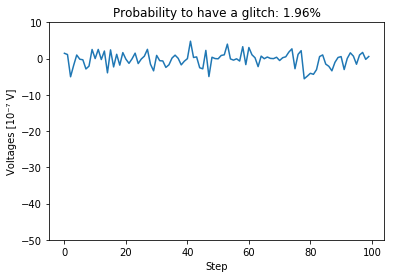

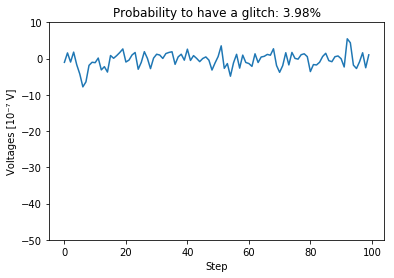

yes


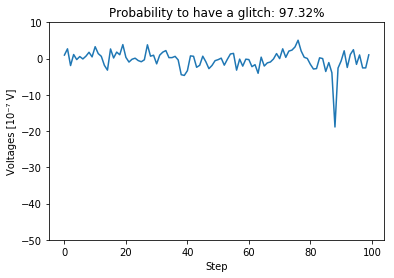

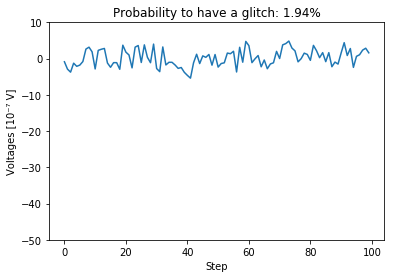

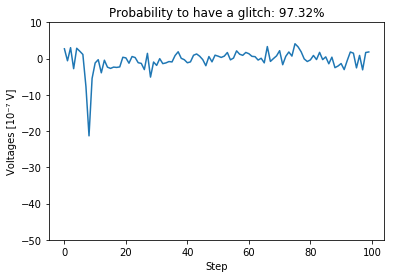

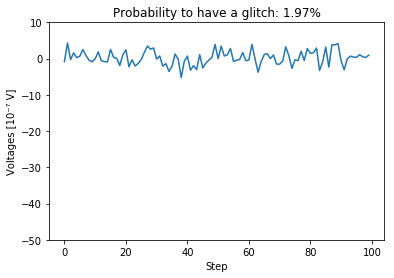

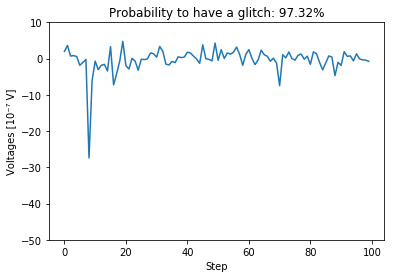

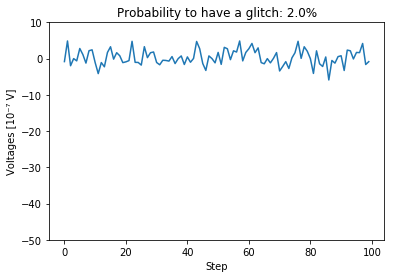

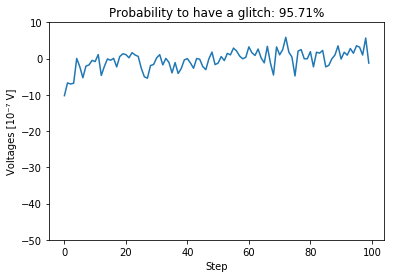

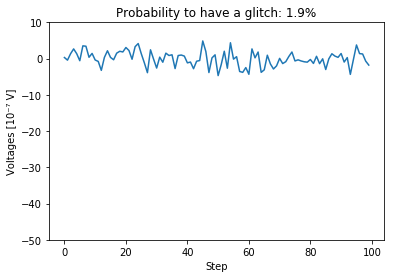

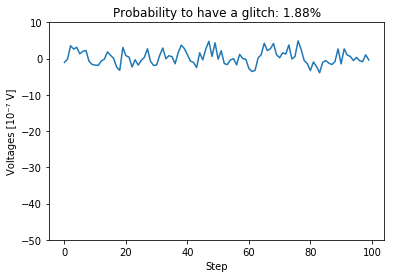

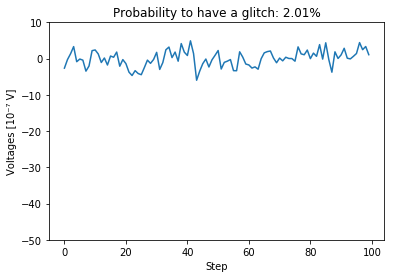

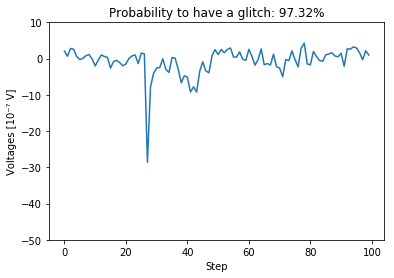

yes


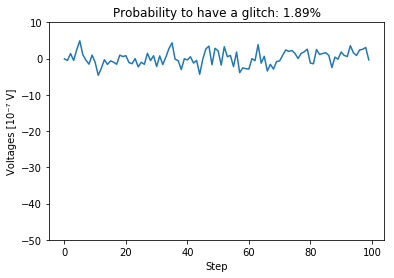

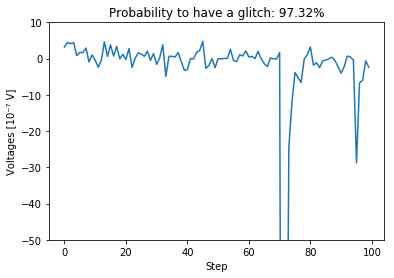

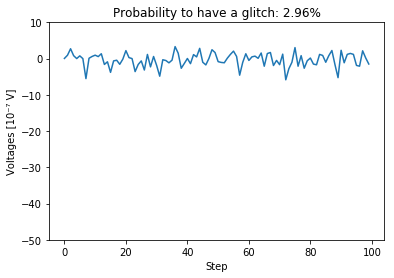

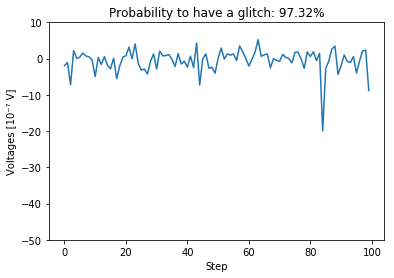

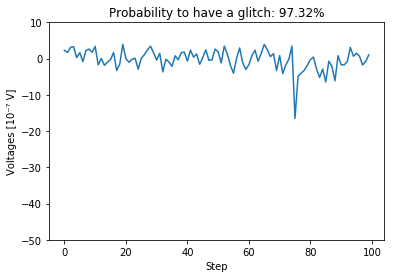

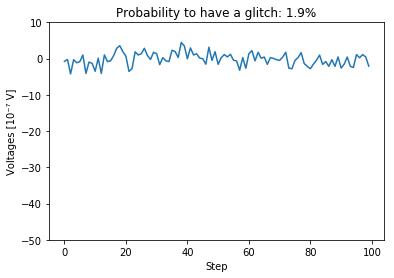

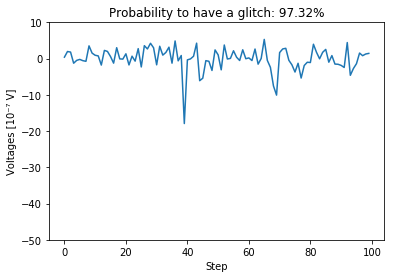

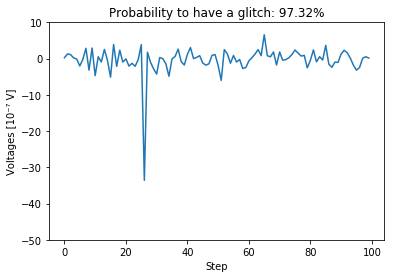

yes


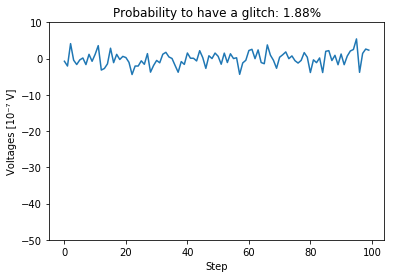

yes


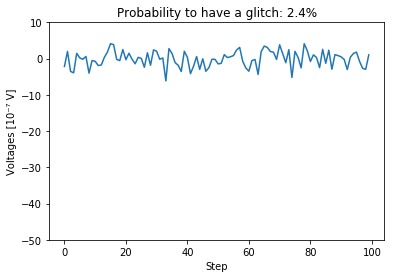

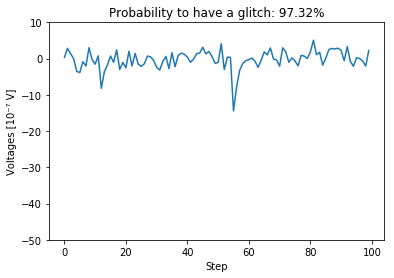

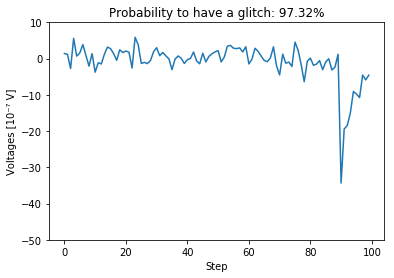

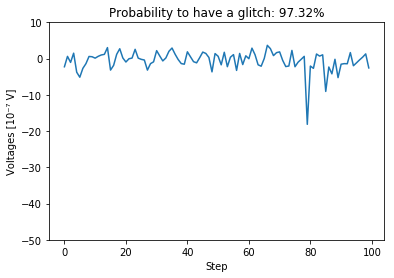

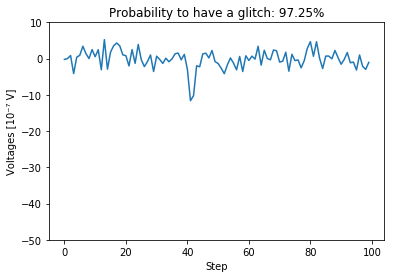

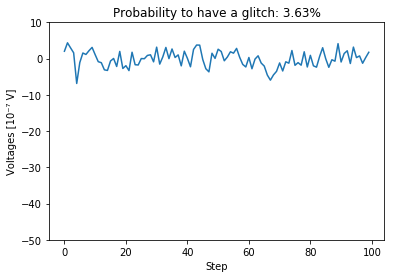

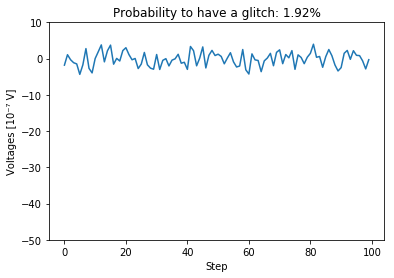

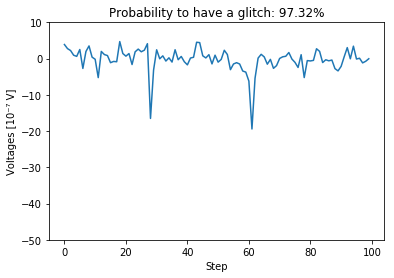

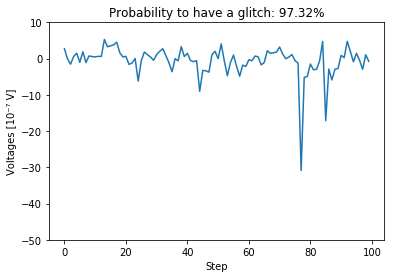

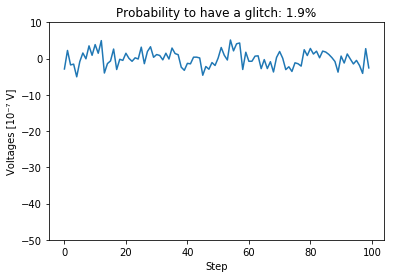

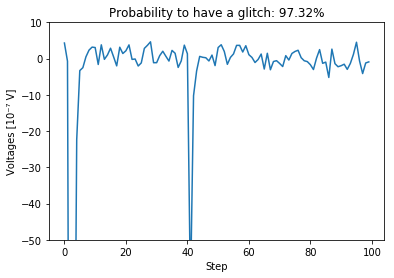

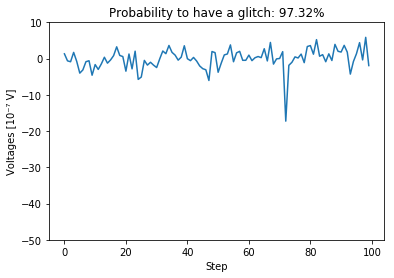

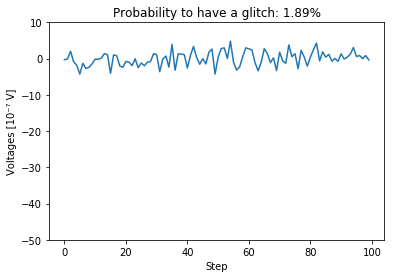

yes


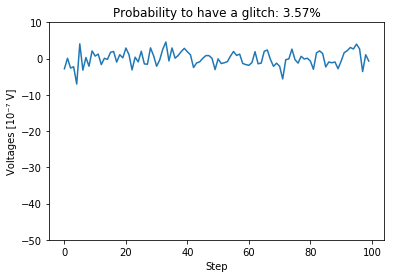

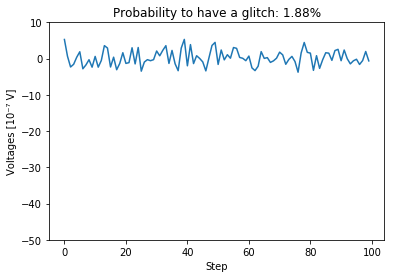

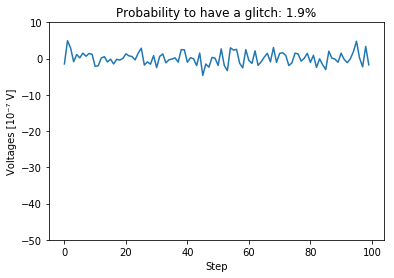

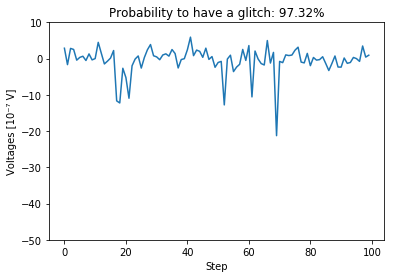

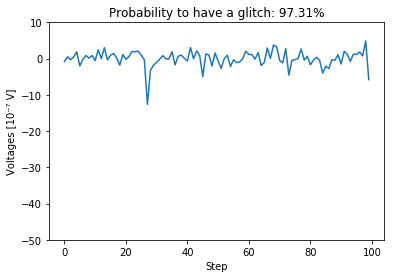

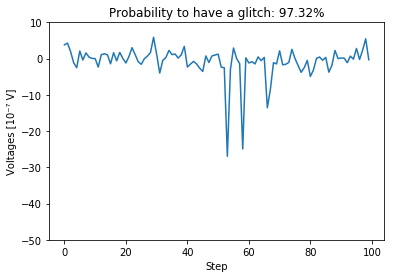

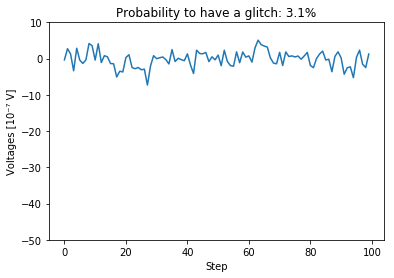

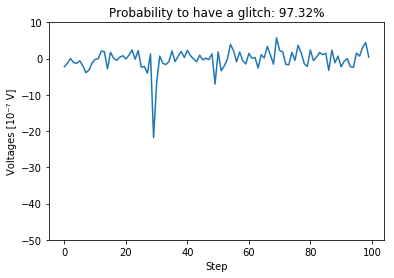

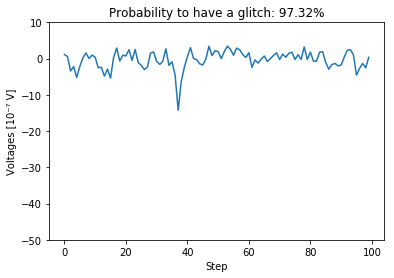

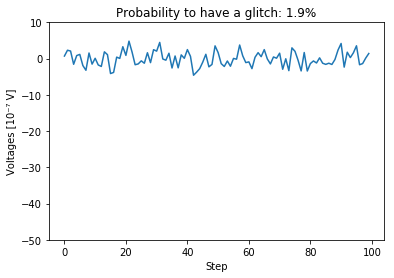

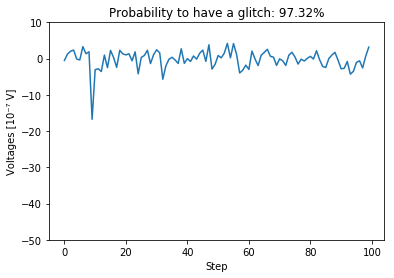

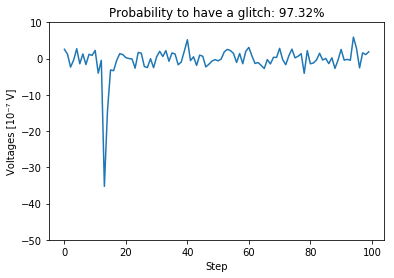

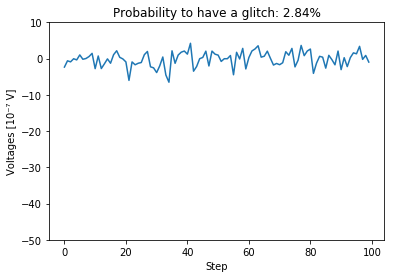

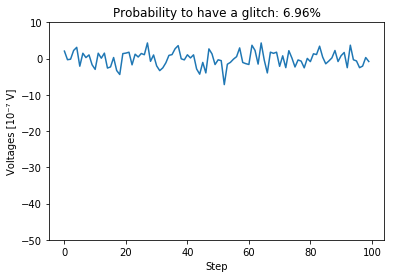

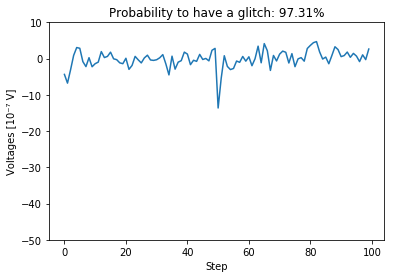

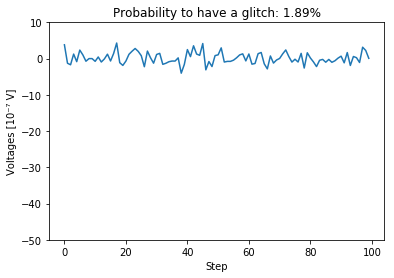

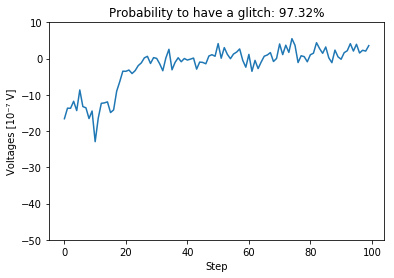

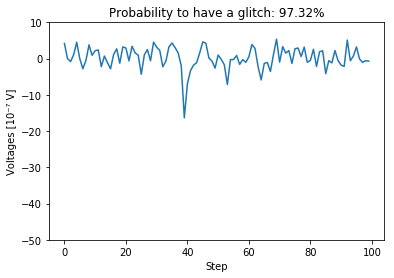

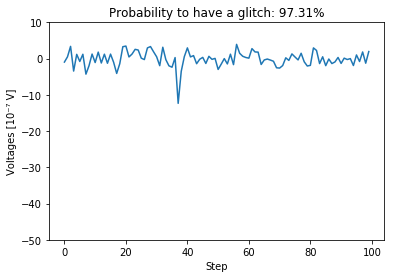

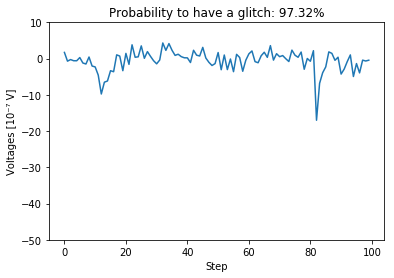

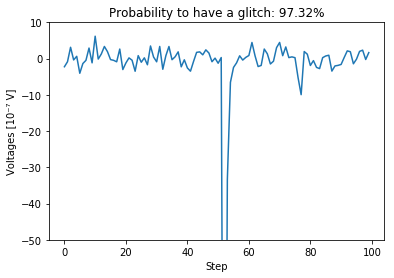

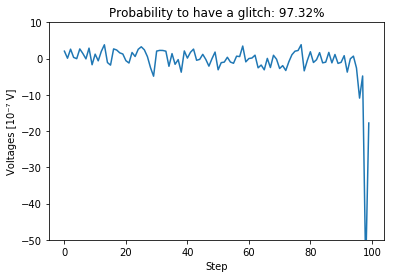

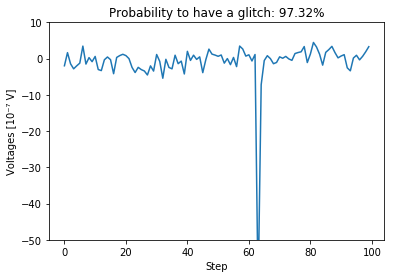

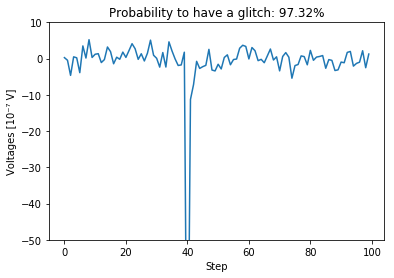

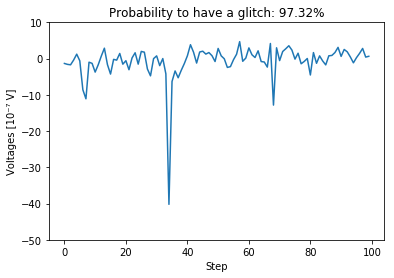

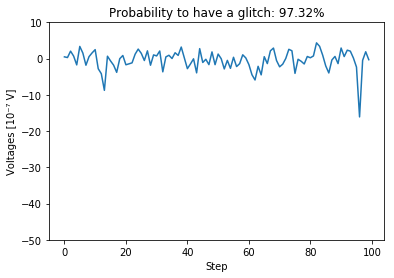

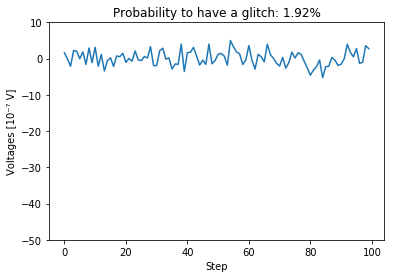

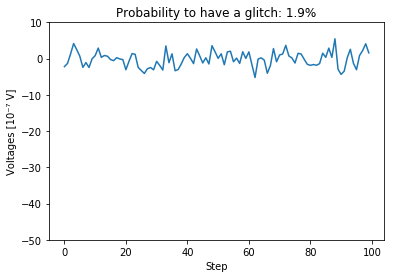

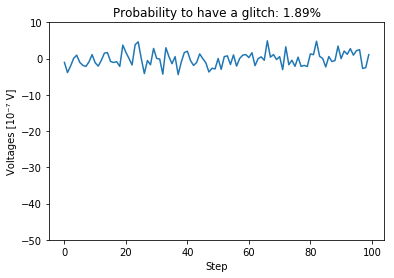

yes


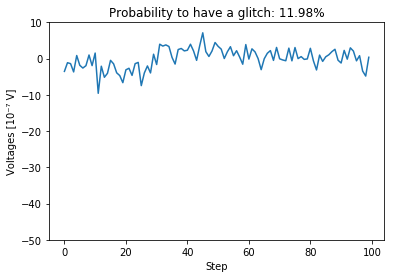

yes


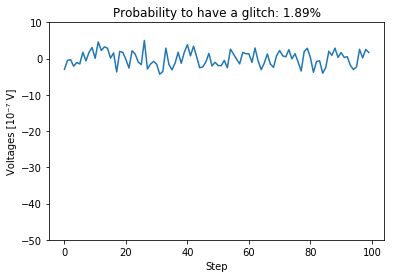

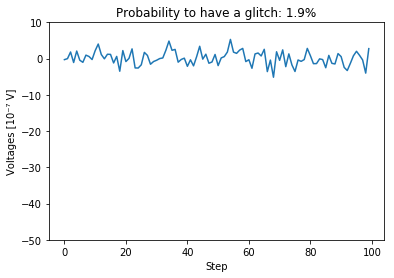

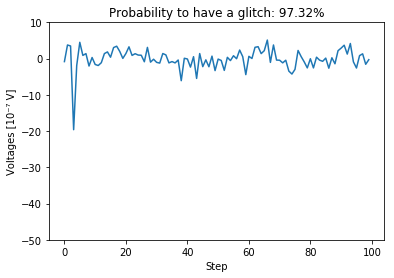

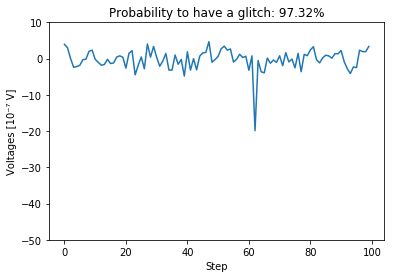

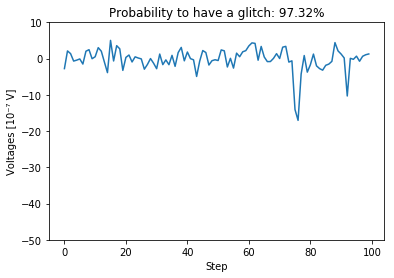

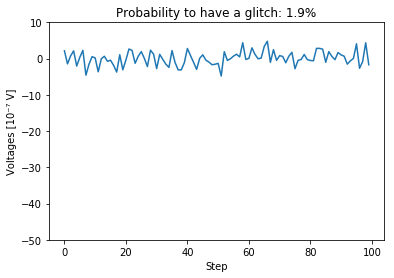

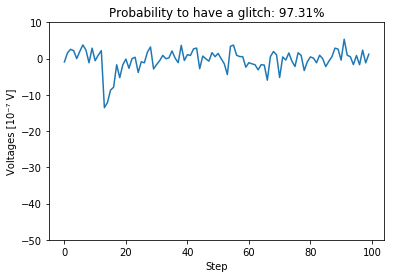

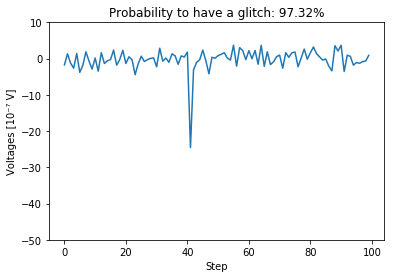

yes


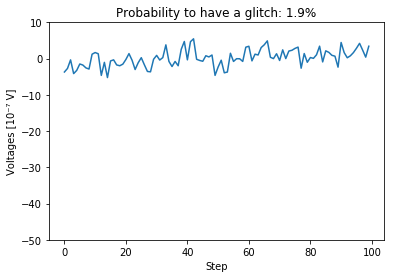

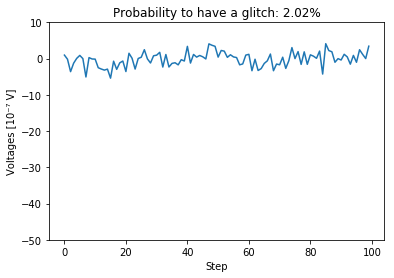

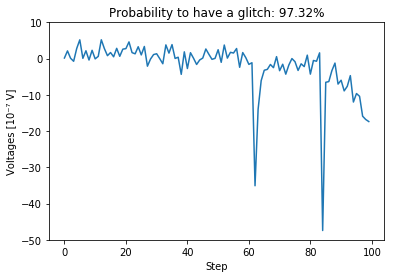

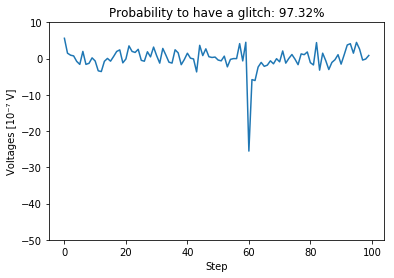

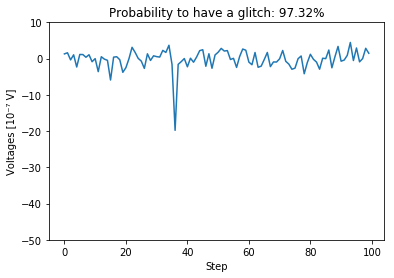

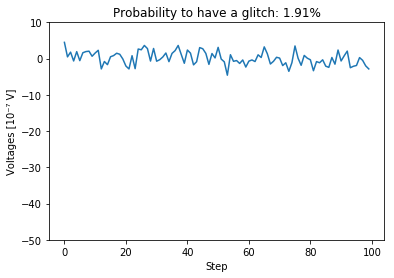

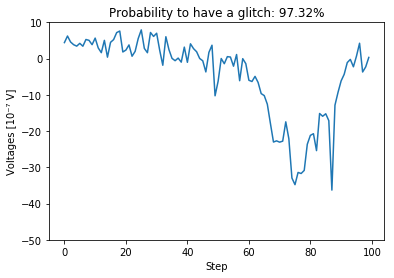

yes


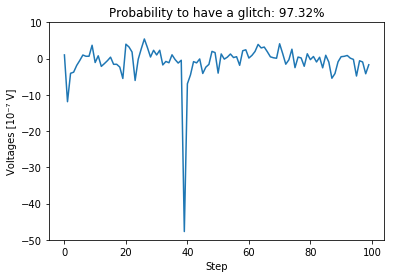

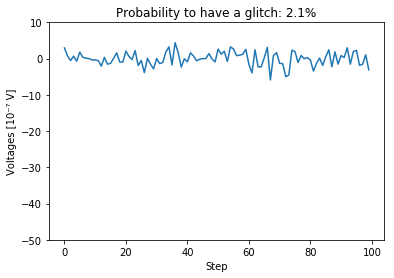

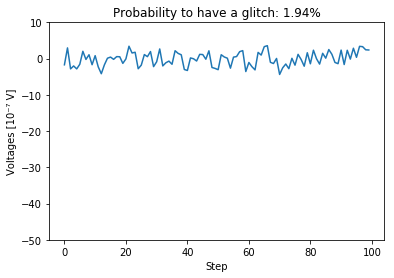

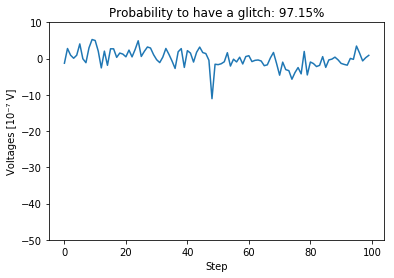

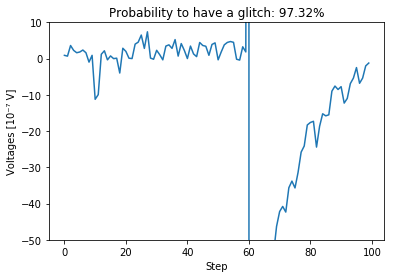

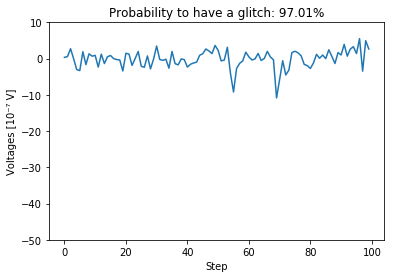

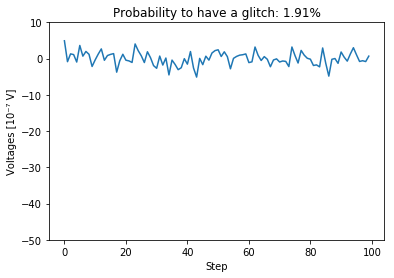

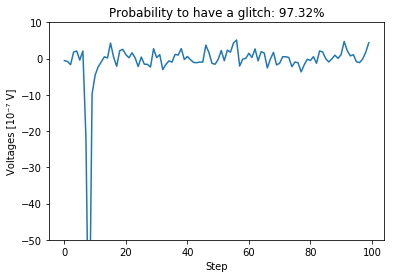

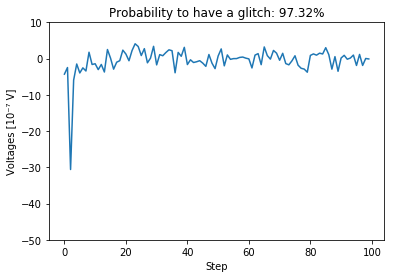

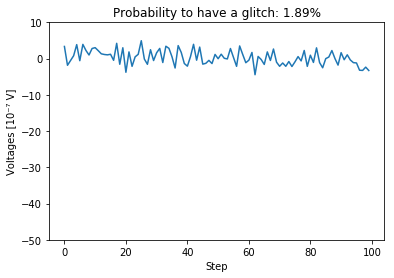

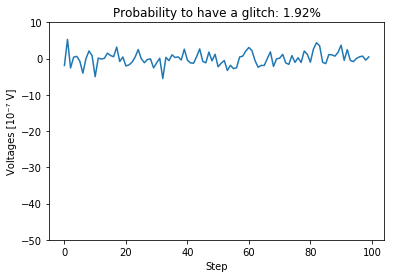

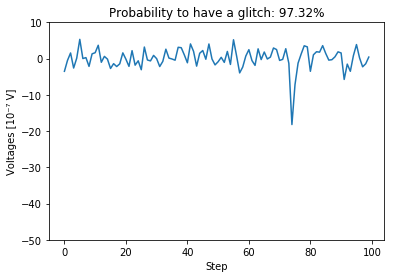

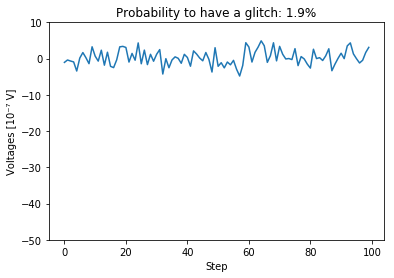

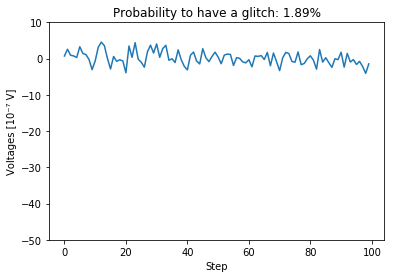

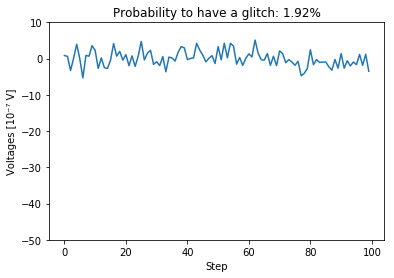

IndexError: index 98 is out of bounds for axis 0 with size 98

<Figure size 432x288 with 0 Axes>

In [15]:
count = 0
for i in range(98):
    fig1 = plt.figure(1)
    plt.plot(x[i,:,0])
    plt.ylabel("Voltages [10⁻⁷ V]")
    plt.xlabel("Step")
    plt.ylim(top=10, bottom=-50)
    x_test = np.reshape(x[i,:,:], (1,100,1))
    plt.title("Probability to have a glitch: "+str(int((np.reshape(my_model.predict(x_test), ()))*10000)/100)+"%")
    plt.show()
    
    answer = input()
    if(answer == "yes" or answer == 'y' or answer == "YES" or answer == "Y"):
        count = count+1
        fig2 = plt.figure(2)
        plt.plot(x[i,:,0])
        plt.ylabel("Voltages [10⁻⁷ V]")
        plt.xlabel("Step")
        plt.ylim(top=10, bottom=-50)
        x_test = np.reshape(x[i,:,:], (1,100,1))
        plt.title("Probability to have a glitch: "+str(int((np.reshape(my_model.predict(x_test), ()))*10000)/100)+"%")
        plt.savefig("../plots_for_latex/plot_"+str(count)+"_3.png", dpi=600)
        plt.close(fig2)
